In [1]:
import pandas as pd
import matplotlib.pyplot as plt
salaries_df = pd.DataFrame(pd.read_excel("salary_data_states_corrected.xlsx"))

#Lets see what kind of information this dataframe holds:

salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167278 entries, 0 to 167277
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   CASE_NUMBER                     167278 non-null  object 
 1   CASE_STATUS                     167278 non-null  object 
 2   CASE_RECEIVED_DATE              167278 non-null  object 
 3   DECISION_DATE                   167278 non-null  object 
 4   EMPLOYER_NAME                   167278 non-null  object 
 5   PREVAILING_WAGE_SUBMITTED       167278 non-null  float64
 6   PREVAILING_WAGE_SUBMITTED_UNIT  167278 non-null  object 
 7   PAID_WAGE_SUBMITTED             167278 non-null  float64
 8   PAID_WAGE_SUBMITTED_UNIT        167278 non-null  object 
 9   JOB_TITLE                       167278 non-null  object 
 10  WORK_CITY                       167275 non-null  object 
 11  EDUCATION_LEVEL_REQUIRED        11093 non-null   object 
 12  COLLEGE_MAJOR_RE

In [2]:
#As we can see, we have a "JOB_TITLE_SUBGROUP" category that we can use to determine if the jobs are related to data.

salaries_df["JOB_TITLE_SUBGROUP"].value_counts()

software engineer        99364
business analyst         27811
assistant professor      18866
teacher                  13912
data analyst              3840
attorney                  1488
data scientist            1227
management consultant      770
Name: JOB_TITLE_SUBGROUP, dtype: int64

In [3]:
#Indeed, we have two categories called "data analyst" and "data scientist" that we can use.
#Lets create a seperate dataframe so that we can work on those data jobs easily.

data_salaries_df = salaries_df.loc[salaries_df['JOB_TITLE_SUBGROUP'].isin(["data analyst", "data scientist"])]

#Lets also drop rows that have missing state or paid_wage information, since we can't use them on our calculations

data_salaries_df = data_salaries_df.dropna(subset=['WORK_STATE', 'PAID_WAGE_PER_YEAR'])

#We actually don't need to have this here since there are no NaN values associates with these parameters, but it is
#Nice to keep this part just incase if we want to use this code with different data with same structure in the future

In [4]:
#Lets group the salary information by taking average yearly paid wage into account and sort them in descending order

sorted_sal_df = data_salaries_df.groupby('WORK_STATE').mean().sort_values(by="PAID_WAGE_PER_YEAR", ascending=[False])
sorted_sal_df = sorted_sal_df.reset_index() #We need to do this to create a plot later
sorted_sal_df

,WORK_STATE,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED,EXPERIENCE_REQUIRED_NUM_MONTHS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,order
0,California,84481.762460,97152.607841,26.351351,86306.714109,99190.308643,61040.866615
1,Washington,79959.856463,93743.267143,24.000000,83041.585034,96887.082857,65070.204082
2,Connecticut,65232.429306,80773.386944,18.000000,66153.830556,81928.386944,97998.277778
3,New York,66684.860703,79209.306352,14.000000,68735.120242,81722.315011,95320.793407
4,Utah,52623.060667,73083.814667,NaN,59263.386667,81707.506667,113041.133333
5,Massachusetts,64895.534618,75737.185462,44.000000,68971.042570,79960.728233,92427.317269
6,District of Columbia,67235.996552,75026.650690,NaN,71601.896552,79758.167931,87589.172414
7,Delaware,66820.365686,75090.434118,12.000000,70197.721569,78561.141176,90899.862745
8,Arizona,63240.569744,75333.582051,NaN,65597.835897,78219.660513,99809.641026
9,New Hampshire,73413.500000,75943.250000,NaN,73413.500000,75943.250000,79891.750000


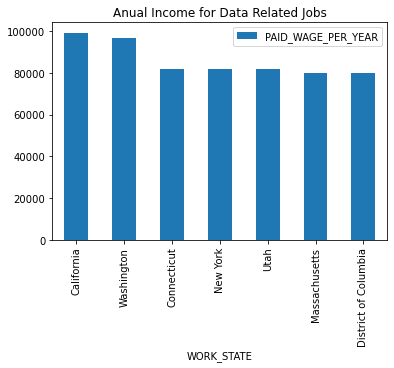

In [5]:
#As expected, California pays the most when it comes to data related jobs. However, it is surprizing to note that
#Utah is also close to the top, could this be related to massive NSA data center located around Bluffdale? Probably.

#Lets use this information to create a plot so that we can visualy see the difference
#I will use the top 7 states to make the plot comprehensible, this can be changes by changing the variable below

state_count = 7
sorted_sal_df.head(state_count).plot(x ='WORK_STATE', y='PAID_WAGE_PER_YEAR', kind = 'bar',
                                     title='Anual Income for Data Related Jobs')
plt.show()

## Differences Between Job Sub-Categories

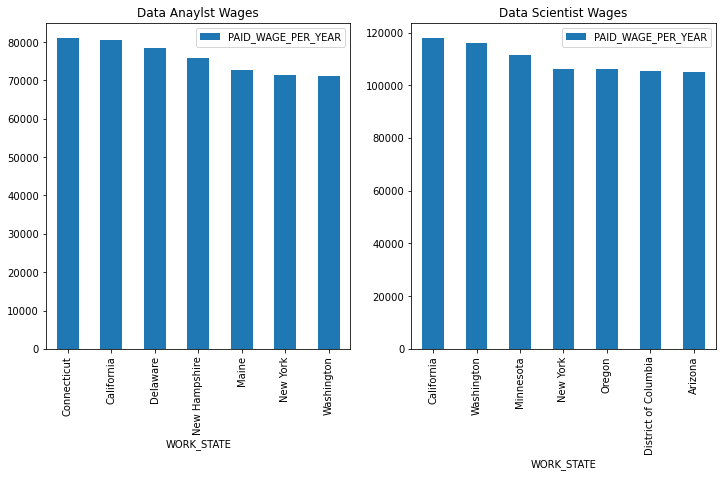

In [6]:
#Now, lets explore the differences between different job subtypes, namely "data analyst" and "data scientist"
#Lets create two different dataframes for the each sub-category

analyst_salaries_df = salaries_df.loc[salaries_df['JOB_TITLE_SUBGROUP'].isin(["data analyst"])]
scientist_salaries_df = salaries_df.loc[salaries_df['JOB_TITLE_SUBGROUP'].isin(["data scientist"])]

#Lets do the row dropping once again:
analyst_salaries_df = analyst_salaries_df.dropna(subset=['WORK_STATE', 'PAID_WAGE_PER_YEAR'])
scientist_salaries_df = scientist_salaries_df.dropna(subset=['WORK_STATE', 'PAID_WAGE_PER_YEAR'])

#Now, lets sort the data frames by taking anual paid wage into account for each state
sorted_analyst_df = analyst_salaries_df.groupby('WORK_STATE').mean().sort_values(by="PAID_WAGE_PER_YEAR", ascending=[False])
sorted_analyst_df = sorted_analyst_df.reset_index() #We need to do this to create a plot later

sorted_scientist_df = scientist_salaries_df.groupby('WORK_STATE').mean().sort_values(by="PAID_WAGE_PER_YEAR", ascending=[False])
sorted_scientist_df = sorted_scientist_df.reset_index() #We need to do this to create a plot later

#We can finally plot them side by side
figure, axis = plt.subplots(1, 2, figsize=(12,6))

#For data analyst
sorted_analyst_df.head(state_count).plot(x ='WORK_STATE', y='PAID_WAGE_PER_YEAR', kind = 'bar'
                                     , ax = axis[0],subplots=True)
axis[0].set_title("Data Anaylst Wages")
  
# For data scientist
sorted_scientist_df.head(state_count).plot(x ='WORK_STATE', y='PAID_WAGE_PER_YEAR', kind = 'bar'
                                     , ax = axis[1],subplots=True)
axis[1].set_title("Data Scientist Wages")

plt.show()

#As we can see from the plots below, Data Scientists earn more than Data Analysts
#Also, states that pay most do differ between data analysts and data scientists sub categories

## Companies With Highest Salaries for Each Sub-Categories 

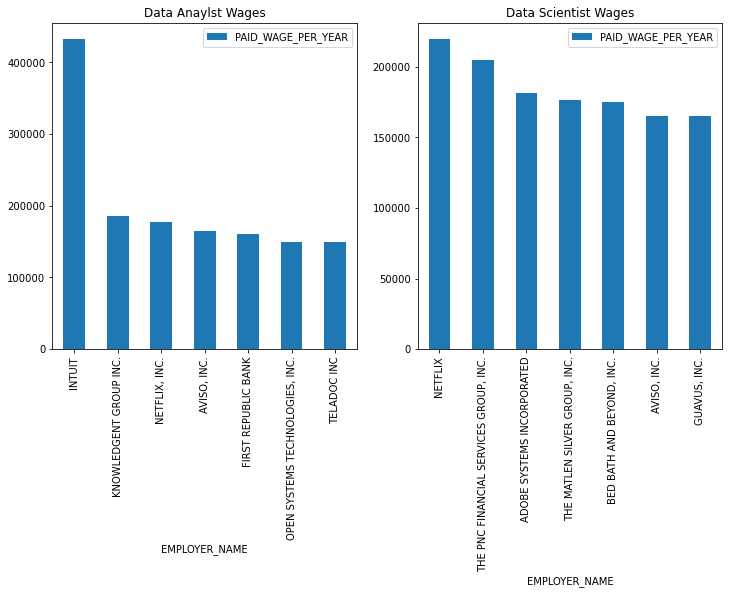

In [7]:
#Now, lets see which companies pays the most for these sub-categories 

#Lets drop rows that has no EMPLOYER_NAME just in case
analyst_salaries_df = analyst_salaries_df.dropna(subset=['EMPLOYER_NAME'])
scientist_salaries_df = scientist_salaries_df.dropna(subset=['EMPLOYER_NAME'])

#Now, lets sort the data frames by taking anual paid wage into account for each employer
sorted_analyst_df_em = analyst_salaries_df.groupby('EMPLOYER_NAME').mean().sort_values(by="PAID_WAGE_PER_YEAR", ascending=[False])
sorted_analyst_df_em = sorted_analyst_df_em.reset_index() #We need to do this to create a plot later

sorted_scientist_df_em = scientist_salaries_df.groupby('EMPLOYER_NAME').mean().sort_values(by="PAID_WAGE_PER_YEAR", ascending=[False])
sorted_scientist_df_em = sorted_scientist_df_em.reset_index() #We need to do this to create a plot later

#Lets plot thhese side by side, just like we did previously
#It is important to note that we can use the dataframes we used in previous step, I am creating new ones for clarity

figure, axis = plt.subplots(1, 2, figsize=(12,6))

#For data analyst
sorted_analyst_df_em.head(state_count).plot(x ='EMPLOYER_NAME', y='PAID_WAGE_PER_YEAR', kind = 'bar'
                                     , ax = axis[0],subplots=True)
axis[0].set_title("Data Anaylst Wages")
  
# For data scientist
sorted_scientist_df_em.head(state_count).plot(x ='EMPLOYER_NAME', y='PAID_WAGE_PER_YEAR', kind = 'bar'
                                     , ax = axis[1],subplots=True)
axis[1].set_title("Data Scientist Wages")

plt.show()

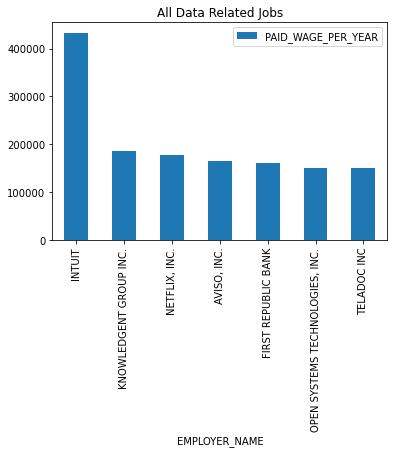

In [8]:
#Lastly, lets create a plot where we see the top paying companies for all data related jobs for perspective.
all_data_sorted_em = data_salaries_df.groupby('EMPLOYER_NAME').mean().sort_values(by="PAID_WAGE_PER_YEAR"
                                                                                  , ascending=[False])
sorted_analyst_df_em.head(state_count).plot(x ='EMPLOYER_NAME', y='PAID_WAGE_PER_YEAR'
                                            , kind = 'bar').set_title("All Data Related Jobs")
plt.show()

## Taking Standart of Living Into Account